In [19]:
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Orienteering on 2D grid

In [90]:
n = 20


In [83]:

grid = np.random.randint(100, size=(n,n))

grid

array([[68, 29, 40, 28, 69, 56,  0, 80,  3, 70, 44, 50, 17, 64, 28, 76,
        31, 63, 72, 31],
       [59, 32, 20, 22, 95, 44, 56,  4, 92, 67, 73, 63, 81, 56, 70, 11,
        23, 30, 14, 34],
       [39, 22, 51, 57, 55, 74, 80, 93, 40, 55, 46, 43, 67,  6, 68, 66,
        48, 32, 37,  5],
       [41, 83, 61, 94,  2, 74, 15, 64,  3, 84, 74, 17, 76, 61, 17, 80,
        69, 81, 75,  6],
       [14, 66, 86, 33, 93, 95, 24, 51, 10, 61, 58, 40, 55, 50,  3, 28,
        99, 69, 93,  4],
       [83, 64,  0, 73, 25,  6, 88, 53, 67, 50, 94, 57, 37, 96, 51, 72,
        90,  1, 25, 75],
       [52, 24, 75, 49,  8, 49, 10,  4, 41, 63, 91, 97, 66, 77, 65, 12,
         5, 18, 28, 23],
       [88,  9, 31, 91, 13, 30, 95, 84, 35, 29, 43, 98, 75,  0, 11, 18,
        80, 55, 25, 85],
       [76, 43, 88, 80, 48, 95, 59, 18, 86,  7, 20, 42, 76,  6, 80, 60,
        63, 73, 56, 45],
       [93, 39, 69,  9, 26, 64, 62, 25, 87, 81, 78, 12, 51, 33, 19, 78,
        10, 56, 35, 95],
       [50,  6, 44, 51, 26,  5

In [93]:
for i in grid:
    for j in i:
        print(j, end = " ")
    print()

68 29 40 28 69 56 0 80 3 70 44 50 17 64 28 76 31 63 72 31 
59 32 20 22 95 44 56 4 92 67 73 63 81 56 70 11 23 30 14 34 
39 22 51 57 55 74 80 93 40 55 46 43 67 6 68 66 48 32 37 5 
41 83 61 94 2 74 15 64 3 84 74 17 76 61 17 80 69 81 75 6 
14 66 86 33 93 95 24 51 10 61 58 40 55 50 3 28 99 69 93 4 
83 64 0 73 25 6 88 53 67 50 94 57 37 96 51 72 90 1 25 75 
52 24 75 49 8 49 10 4 41 63 91 97 66 77 65 12 5 18 28 23 
88 9 31 91 13 30 95 84 35 29 43 98 75 0 11 18 80 55 25 85 
76 43 88 80 48 95 59 18 86 7 20 42 76 6 80 60 63 73 56 45 
93 39 69 9 26 64 62 25 87 81 78 12 51 33 19 78 10 56 35 95 
50 6 44 51 26 5 77 99 64 77 35 24 82 11 34 58 46 21 46 89 
36 83 57 9 43 84 30 17 65 39 85 97 15 10 20 61 27 73 65 88 
82 66 41 13 23 16 80 7 28 15 48 45 84 78 18 91 14 35 88 43 
72 84 77 62 72 88 98 46 58 23 69 4 89 88 62 91 64 18 87 9 
11 77 93 88 15 57 79 84 29 22 34 51 20 96 34 78 57 5 71 49 
99 52 21 62 93 43 91 51 11 27 17 3 87 80 9 85 69 42 48 42 
83 33 91 87 71 55 20 69 90 93 44 66 78 34 37 71 24 90 

### Brute Force

In [49]:
# TIME COMPLEXITY: 4^length * n^2 + n^3
from tqdm.notebook import tqdm
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 10
validPaths = []
def dfs(x, y, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath) == length+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        validPaths = []
        dfs(i,j,[])
        for path in validPaths:
            score = 0
            if path[0] == path[-1]:
                spath = set(path)
                for point in spath:
                    score += grid[point[0]][point[1]]
            if (max_score < score):
                max_score = score
                max_path = path.copy()
print(max_score)
print(max_path)

  0%|          | 0/10 [00:00<?, ?it/s]

790
[(1, 6), (1, 7), (1, 8), (1, 9), (2, 9), (2, 8), (2, 7), (3, 7), (3, 6), (2, 6), (1, 6)]


### Modified Brute Force

In [87]:
# TIME COMPLEXITY: < n^4 * (4^(length))
from tqdm.notebook import tqdm
import numpy as np
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 12
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)

  0%|          | 0/20 [00:00<?, ?it/s]

972
[(17, 10), (17, 11), (17, 12), (17, 13), (18, 13), (18, 14), (19, 14), (19, 13), (19, 12), (19, 11), (19, 10), (18, 10), (17, 10)]


In [92]:
# TIME COMPLEXITY: < n^4 * (4^(length))
from tqdm.notebook import tqdm
import numpy as np
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 14
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)

  0%|          | 0/20 [00:00<?, ?it/s]

1116
[(16, 11), (16, 12), (17, 12), (17, 13), (18, 13), (18, 14), (19, 14), (19, 13), (19, 12), (19, 11), (19, 10), (18, 10), (17, 10), (17, 11), (16, 11)]


In [12]:
def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

In [28]:
n = 20
length = 12
grid = [[68, 29, 40, 28, 69, 56,  0, 80,  3, 70, 44, 50, 17, 64, 28, 76,
        31, 63, 72, 31],
       [59, 32, 20, 22, 95, 44, 56,  4, 92, 67, 73, 63, 81, 56, 70, 11,
        23, 30, 14, 34],
       [39, 22, 51, 57, 55, 74, 80, 93, 40, 55, 46, 43, 67,  6, 68, 66,
        48, 32, 37,  5],
       [41, 83, 61, 94,  2, 74, 15, 64,  3, 84, 74, 17, 76, 61, 17, 80,
        69, 81, 75,  6],
       [14, 66, 86, 33, 93, 95, 24, 51, 10, 61, 58, 40, 55, 50,  3, 28,
        99, 69, 93,  4],
       [83, 64,  0, 73, 25,  6, 88, 53, 67, 50, 94, 57, 37, 96, 51, 72,
        90,  1, 25, 75],
       [52, 24, 75, 49,  8, 49, 10,  4, 41, 63, 91, 97, 66, 77, 65, 12,
         5, 18, 28, 23],
       [88,  9, 31, 91, 13, 30, 95, 84, 35, 29, 43, 98, 75,  0, 11, 18,
        80, 55, 25, 85],
       [76, 43, 88, 80, 48, 95, 59, 18, 86,  7, 20, 42, 76,  6, 80, 60,
        63, 73, 56, 45],
       [93, 39, 69,  9, 26, 64, 62, 25, 87, 81, 78, 12, 51, 33, 19, 78,
        10, 56, 35, 95],
       [50,  6, 44, 51, 26,  5, 77, 99, 64, 77, 35, 24, 82, 11, 34, 58,
        46, 21, 46, 89],
       [36, 83, 57,  9, 43, 84, 30, 17, 65, 39, 85, 97, 15, 10, 20, 61,
        27, 73, 65, 88],
       [82, 66, 41, 13, 23, 16, 80,  7, 28, 15, 48, 45, 84, 78, 18, 91,
        14, 35, 88, 43],
       [72, 84, 77, 62, 72, 88, 98, 46, 58, 23, 69,  4, 89, 88, 62, 91,
        64, 18, 87,  9],
       [11, 77, 93, 88, 15, 57, 79, 84, 29, 22, 34, 51, 20, 96, 34, 78,
        57,  5, 71, 49],
       [99, 52, 21, 62, 93, 43, 91, 51, 11, 27, 17,  3, 87, 80,  9, 85,
        69, 42, 48, 42],
       [83, 33, 91, 87, 71, 55, 20, 69, 90, 93, 44, 66, 78, 34, 37, 71,
        24, 90, 65, 13],
       [59, 27, 31, 35, 73, 26, 17, 60, 72, 82, 76, 63, 44, 87, 14, 20,
        13, 33, 34, 90],
       [46,  6,  1, 18, 40, 39,  1, 91, 38, 58, 93, 48,  0, 81, 97, 30,
        88, 38, 94, 57],
       [30, 44, 60, 85, 66, 21, 43, 79, 98, 37, 67, 83, 97, 85, 99,  4,
        16, 61, 25, 71]]

max_score = 972
max_path = [(17, 10), (17, 11), (17, 12), (17, 13), (18, 13), (18, 14), (19, 14), (19, 13), (19, 12), (19, 11), (19, 10), (18, 10), (17, 10)]

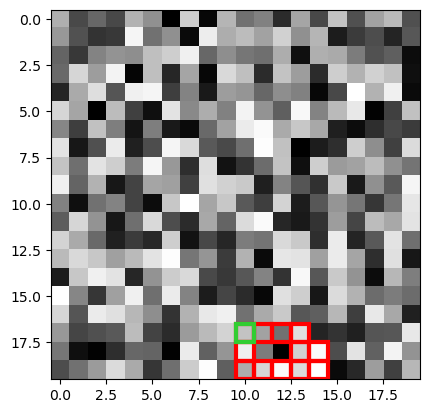

In [29]:
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

In [30]:
#RUNTIME: ~6 hours
n = 20
length = 14
grid = [[68, 29, 40, 28, 69, 56,  0, 80,  3, 70, 44, 50, 17, 64, 28, 76,
        31, 63, 72, 31],
       [59, 32, 20, 22, 95, 44, 56,  4, 92, 67, 73, 63, 81, 56, 70, 11,
        23, 30, 14, 34],
       [39, 22, 51, 57, 55, 74, 80, 93, 40, 55, 46, 43, 67,  6, 68, 66,
        48, 32, 37,  5],
       [41, 83, 61, 94,  2, 74, 15, 64,  3, 84, 74, 17, 76, 61, 17, 80,
        69, 81, 75,  6],
       [14, 66, 86, 33, 93, 95, 24, 51, 10, 61, 58, 40, 55, 50,  3, 28,
        99, 69, 93,  4],
       [83, 64,  0, 73, 25,  6, 88, 53, 67, 50, 94, 57, 37, 96, 51, 72,
        90,  1, 25, 75],
       [52, 24, 75, 49,  8, 49, 10,  4, 41, 63, 91, 97, 66, 77, 65, 12,
         5, 18, 28, 23],
       [88,  9, 31, 91, 13, 30, 95, 84, 35, 29, 43, 98, 75,  0, 11, 18,
        80, 55, 25, 85],
       [76, 43, 88, 80, 48, 95, 59, 18, 86,  7, 20, 42, 76,  6, 80, 60,
        63, 73, 56, 45],
       [93, 39, 69,  9, 26, 64, 62, 25, 87, 81, 78, 12, 51, 33, 19, 78,
        10, 56, 35, 95],
       [50,  6, 44, 51, 26,  5, 77, 99, 64, 77, 35, 24, 82, 11, 34, 58,
        46, 21, 46, 89],
       [36, 83, 57,  9, 43, 84, 30, 17, 65, 39, 85, 97, 15, 10, 20, 61,
        27, 73, 65, 88],
       [82, 66, 41, 13, 23, 16, 80,  7, 28, 15, 48, 45, 84, 78, 18, 91,
        14, 35, 88, 43],
       [72, 84, 77, 62, 72, 88, 98, 46, 58, 23, 69,  4, 89, 88, 62, 91,
        64, 18, 87,  9],
       [11, 77, 93, 88, 15, 57, 79, 84, 29, 22, 34, 51, 20, 96, 34, 78,
        57,  5, 71, 49],
       [99, 52, 21, 62, 93, 43, 91, 51, 11, 27, 17,  3, 87, 80,  9, 85,
        69, 42, 48, 42],
       [83, 33, 91, 87, 71, 55, 20, 69, 90, 93, 44, 66, 78, 34, 37, 71,
        24, 90, 65, 13],
       [59, 27, 31, 35, 73, 26, 17, 60, 72, 82, 76, 63, 44, 87, 14, 20,
        13, 33, 34, 90],
       [46,  6,  1, 18, 40, 39,  1, 91, 38, 58, 93, 48,  0, 81, 97, 30,
        88, 38, 94, 57],
       [30, 44, 60, 85, 66, 21, 43, 79, 98, 37, 67, 83, 97, 85, 99,  4,
        16, 61, 25, 71]]

max_score = 1116
max_path = [(16, 11), (16, 12), (17, 12), (17, 13), (18, 13), (18, 14), (19, 14), (19, 13), (19, 12), (19, 11), (19, 10), (18, 10), (17, 10), (17, 11), (16, 11)]

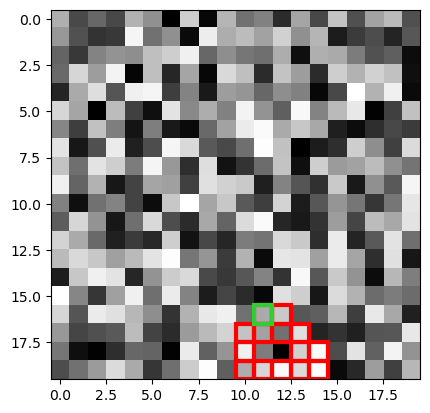

In [31]:
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

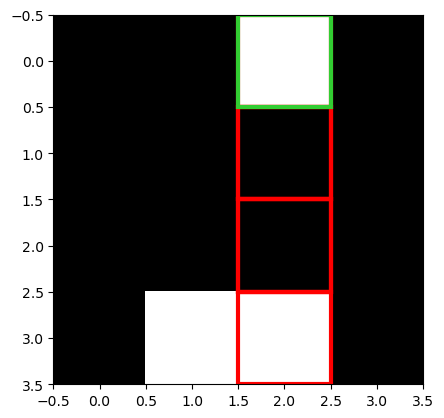

In [22]:
n = 4
grid = [[0,0,10,0],
       [0,0,0,0],
       [0,0,0,0],
       [0,10,10,0]]
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 6
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

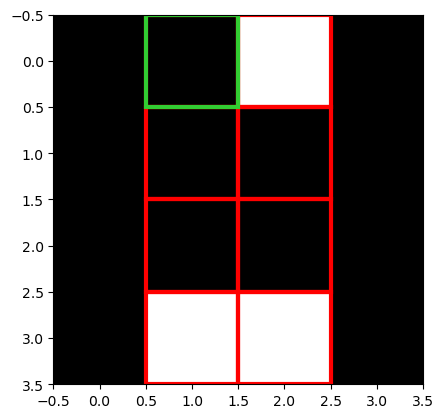

In [23]:
n = 4
grid = [[0,0,10,0],
       [0,0,0,0],
       [0,0,0,0],
       [0,10,10,0]]
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 8
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

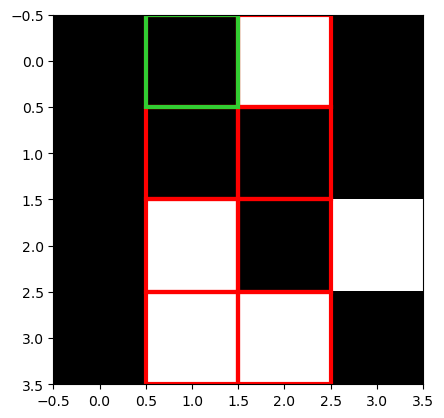

In [24]:
n = 4
grid = [[0,0,10,0],
       [0,0,0,0],
       [0,10,0,10],
       [0,10,10,0]]
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 8
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

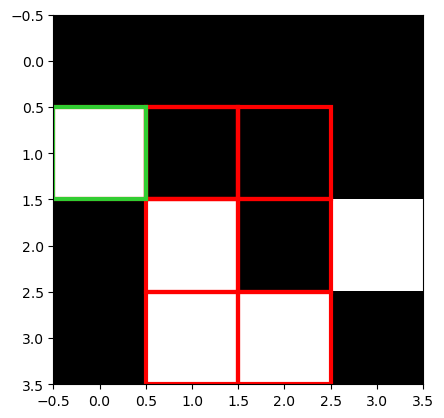

In [25]:
n = 4
grid = [[0,0,0,0],
       [10,0,0,0],
       [0,10,0,10],
       [0,10,10,0]]
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 8
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)

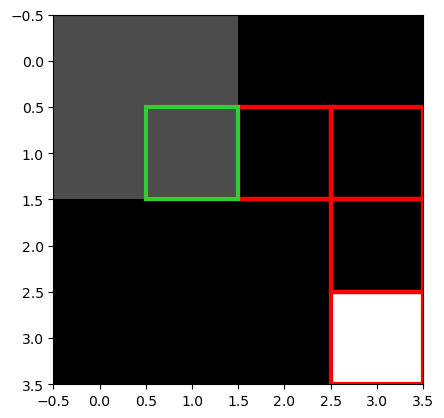

In [27]:
n = 4
grid = [[30,30,0,0],
       [30,30,0,0],
       [0,0,0,0],
       [0,0,0,100]]
dirx = [-1, 0, 1, 0]
diry = [0, 1, 0, -1]
length = 8
validPaths = []
def dfs(x, y, goalx, goaly, curPath):
    global validPaths, dirx, diry, length
    curPath.append((x,y))
    if (len(curPath)+abs(goalx-x)+abs(goaly-y) > length/2+1):
        curPath.pop(-1)
        return
    if (len(curPath) == length/2+1):
        validPaths.append(curPath.copy())
        curPath.pop(-1)
        return
    for ind in range(4):
        newx = dirx[ind] + x
        newy = diry[ind] + y
        if (newx >= n or newy >= n or newx < 0 or newy < 0):
            continue
        dfs(newx,newy,goalx,goaly,curPath)
    curPath.pop(-1)
max_score = 0
max_path = []
for i in tqdm(range(n)):
    for j in range(n):
        for k in range(n):
            for l in range(n):
                validPaths = []
                dfs(i,j,k,l,[])
                for firstPath in range(len(validPaths)):
                    for secondPath in range(len(validPaths)):
                        score = 0
                        spath = set(validPaths[firstPath] + validPaths[secondPath])
                        for point in spath:
                            score += grid[point[0]][point[1]]
                        if (max_score < score):
                            max_score = score
                            max_path = validPaths[firstPath][:-1] + validPaths[secondPath][::-1]
print(max_score)
print(max_path)
for i in range(len(max_path)):
    plt.imshow(grid, interpolation='none', cmap="gray")
    for j in range(i):
        highlight_cell(max_path[j][1],max_path[j][0], color="red", linewidth=3)
    highlight_cell(max_path[i][1],max_path[i][0], color="limegreen", linewidth=3)
    plt.show()
    time.sleep(0.5)
    clear_output(wait=True)